In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
import seaborn as sns
from mlxtend.plotting import plot_decision_regions


In [22]:
class SingleNeuron:
    def __init__(self, activation_function):
        self.activation_function = activation_function
        self.weights = None
        self.errors = []
        self.bias = 0
    def train(self, X, y, alpha=0.005,epochs=50):
        self.weights = np.random.randn(X.shape[1])
        N = X.shape[0]

        for _ in range(epochs):
            errors = 0
            for xi,target in zip(X,y):
                error = self.predict(xi) - target
                self.weights -= alpha * error * xi
                self.bias -= alpha * error
                errors += 0.5*(error**2)
            self.errors.append(errors/N)
        return self
    def predict(self, X):
        preactivation = np.dot(X, self.weights) + self.bias
        return self.activation_function(preactivation)

In [16]:
#Load the diabetes dataset
diabetes = datasets.load_diabetes(as_frame=True)
df = diabetes.frame
X = df["bmi"].values

# Take the transpose
X = X.reshape(-1,1)

y = df["target"].values
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


Note: The data in each column is centered around the mean and scaled by the standard deviation, so the values are simply a relation to the mean.

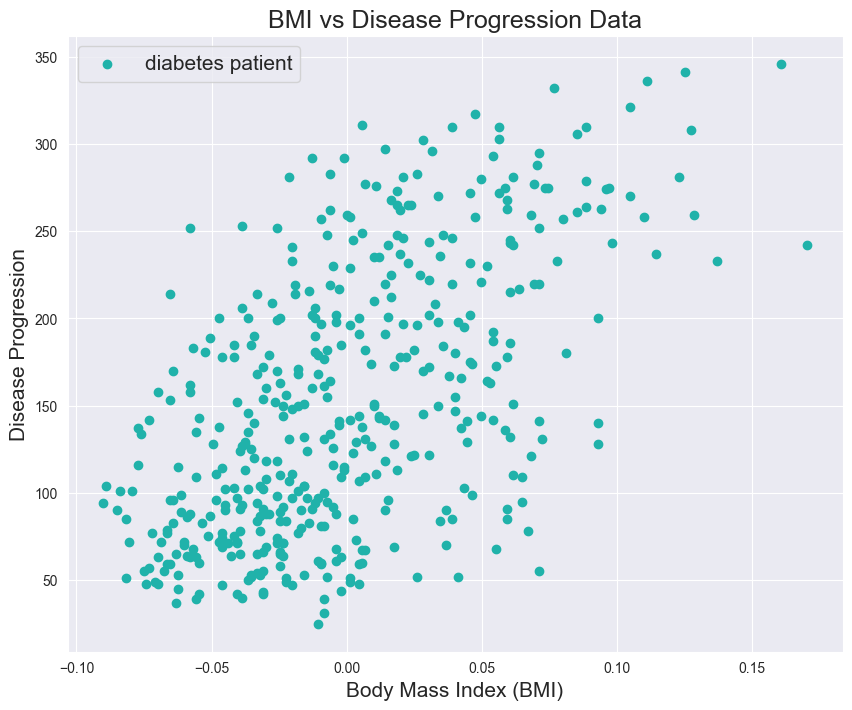

In [30]:
plt.figure(figsize = (10, 8))
plt.scatter(X, y, color = "lightseagreen", label = "diabetes patient")
plt.xlabel("Body Mass Index (BMI)", fontsize = 15)
plt.ylabel("Disease Progression", fontsize = 15)
plt.title("BMI vs Disease Progression Data", fontsize = 18)
plt.legend(fontsize = 15)
plt.show()

In [37]:
# Define the linear activation function to be used as the parameter for the instance of the SingleNeuron.
def linear_activation(z):
    return z

node = SingleNeuron(linear_activation).train(X,y,alpha=0.005,epochs=1000)

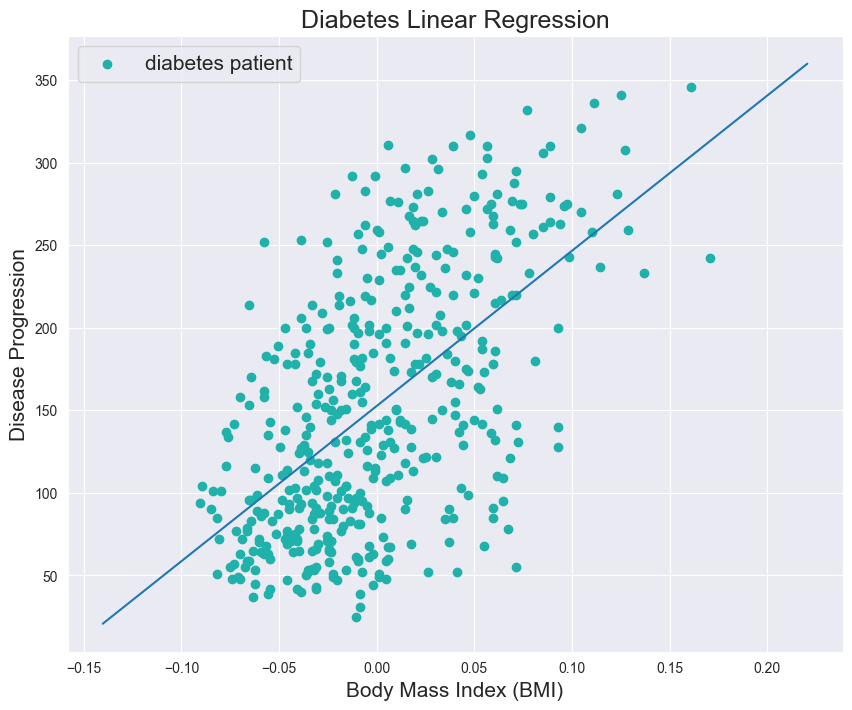

In [46]:
domain = np.linspace(np.min(X) - .05, np.max(X) + .05, 100)
plt.figure(figsize = (10, 8))
plt.scatter(X, y, color = "lightseagreen", label = "diabetes patient")
plt.plot( domain, node.predict(domain.reshape(-1, 1)))
plt.xlabel("Body Mass Index (BMI)", fontsize = 15)
plt.ylabel("Disease Progression", fontsize = 15)
plt.title("Diabetes Linear Regression", fontsize = 18)
plt.legend(fontsize = 15)
plt.show()

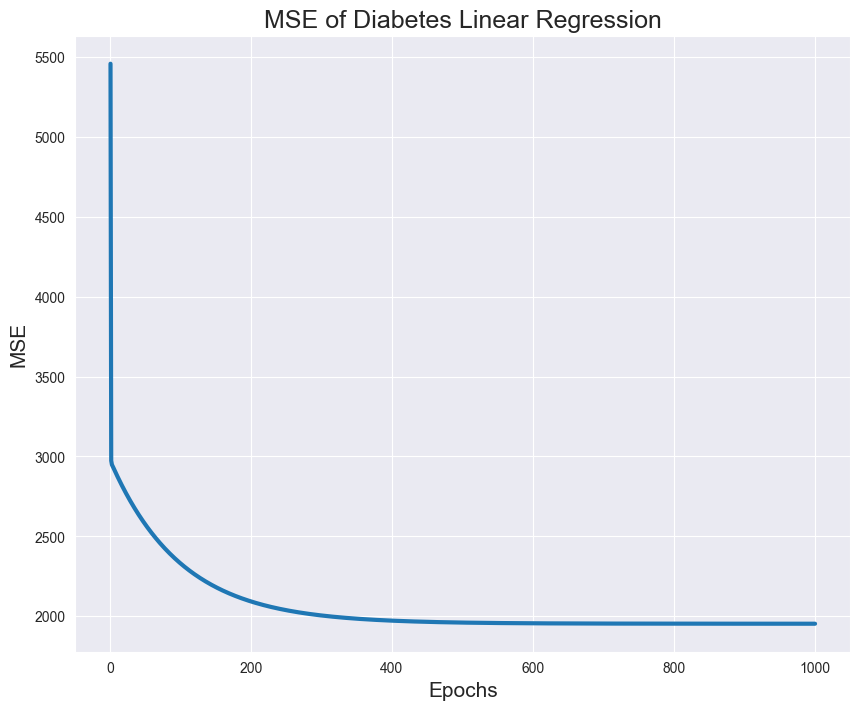

In [44]:
domain = np.linspace(np.min(X) - .05, np.max(X) + .05, 100)
plt.figure(figsize = (10, 8))
plt.plot((range(1, len(node.errors) + 1)), node.errors,linewidth=3)
plt.xlabel("Epochs", fontsize = 15)
plt.ylabel("MSE", fontsize = 15)
plt.title("MSE of Diabetes Linear Regression", fontsize = 18)
plt.show()

Conclusion:
We can use the Linear Regression model to try to find the best linear relationship between the features of a dataset. In the diabetes dataset, the columns include more than just BMI, but I felt that BMI could be a fairly important factor to predict diabetes progression over a year, so I singled it out. I chose just one feature so that the linear regression could be clearly visualized. Just from looking at the data, it is clear that there is some weak positive correlation between BMI and diabetes progression. Running the Linear Regression algorithm over a large number of epochs with an appropriate learning rate will minimize the mean squared error (MSE) of the linear regression line, giving the most accurate linear relationship between BMI and diabetes progression. In this case, the data is not all that correlated, so no better than about 1900 mean squared error can be achieved.